<a href="https://colab.research.google.com/github/DavidMao0310/LR-and-random-forest-for-prediction/blob/main/FYP_Midterm_Pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

--2020-12-29 06:40:57--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-12-29 06:40:58--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-12-29 06:40:58--  https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.so

In [28]:
url = 'https://github.com/DavidMao0310/LR-and-random-forest-for-prediction/raw/main/TSLA.csv'
data = pd.read_csv(url)
pd.set_option('display.max_columns', None)
print(data)
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')
data.set_index('Date', inplace=True)
data['1d_future_close'] = data['Adj_Close'].shift(-1)
data['1d_close_pct'] = data['Adj_Close'].pct_change(1)
data['Volume_1d_change'] = data['Volume'].pct_change(1)
feature_names = ['1d_close_pct', 'Volume_1d_change']
for n in [14, 30]:
    data['sma' + str(n)] = ta.SMA(data['Adj_Close'].values, timeperiod=n)
    data['rsi' + str(n)] = ta.RSI(data['Adj_Close'].values, timeperiod=n)
    data['ema' + str(n)] = ta.EMA(data['Adj_Close'].values, timeperiod=n)
    data['std' + str(n)] = ta.STDDEV(data['Adj_Close'].values, timeperiod=n)
    feature_names = feature_names + ['sma' + str(n), 'rsi' + str(n), 'ema' + str(n), 'std' + str(n)]
data['ATR'] = ta.ATR(data['High'].values,
                     data['Low'].values,
                     data['Adj_Close'].values,
                     timeperiod=14)
data['ADX'] = ta.ADX(data['High'].values,
                     data['Low'].values,
                     data['Adj_Close'].values,
                     timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(data['Adj_Close'].values,
                                     fastperiod=12,
                                     slowperiod=26,
                                     signalperiod=9)
data['MACD'] = macd
data['MACDsignal'] = macdsignal
feature_names = feature_names + ['ATR', 'ADX', 'MACD', 'MACDsignal']
print(data)
data = data.dropna()


            Date       Open       High        Low      Close  Adj_Close  \
0       2015/1/2  44.574001  44.650002  42.652000  43.862000  43.862000   
1       2015/1/5  42.910000  43.299999  41.431999  42.018002  42.018002   
2       2015/1/6  42.012001  42.840000  40.841999  42.256001  42.256001   
3       2015/1/7  42.669998  42.956001  41.956001  42.189999  42.189999   
4       2015/1/8  42.562000  42.759998  42.001999  42.124001  42.124001   
...          ...        ...        ...        ...        ...        ...   
1252  2019/12/23  82.356003  84.402000  82.000000  83.844002  83.844002   
1253  2019/12/24  83.671997  85.094002  82.538002  85.050003  85.050003   
1254  2019/12/26  85.582001  86.695999  85.269997  86.188004  86.188004   
1255  2019/12/27  87.000000  87.061996  85.222000  86.075996  86.075996   
1256  2019/12/30  85.758003  85.800003  81.851997  82.940002  82.940002   

        Volume  
0     23822000  
1     26842500  
2     31309500  
3     14842000  
4     17212500

In [10]:
features = data[feature_names]
targets = pd.DataFrame(data['1d_future_close'])###
F_scaled = preprocessing.MinMaxScaler().fit_transform(features)
features = pd.DataFrame(F_scaled)
features.columns = feature_names
T_scaled = preprocessing.MinMaxScaler().fit_transform(targets)
targets = T_scaled.ravel()  #Change it to 1D array

train_size = int(0.8 * targets.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

print('Training Features Shape:', train_features.shape)
print('Training Targets Shape:', train_targets.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Targets Shape:', test_targets.shape, '\n')



Training Features Shape: (978, 14)
Training Targets Shape: (978,)
Testing Features Shape: (245, 14)
Testing Targets Shape: (245,) 



LR train 0.9796312814961573
LR test 0.9696006211731871
intercept =  0.051218607872348554 
 slope= [ 1.07531997e-01  1.91896050e-03  5.83686134e-01  1.43483624e-01
  4.50314353e+00  4.24816787e-03  2.36443650e-01 -7.19503004e-02
 -3.77132627e+00  1.06787994e-02 -3.37229186e-03 -3.63704135e-03
 -6.55067222e-04 -7.71751904e-01] 



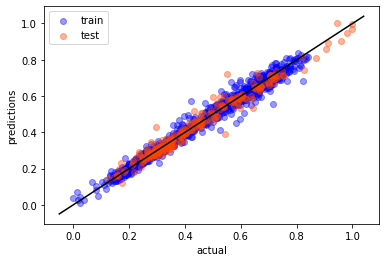

In [24]:
from sklearn import linear_model as lm
skmodel = lm.LinearRegression().fit(train_features,train_targets)
def LM(skmodel, train_features, train_targets ,test_features, test_targets):
    print('LR train', skmodel.score(train_features, train_targets))
    print('LR test', skmodel.score(test_features, test_targets))
    print('intercept = ', skmodel.intercept_, '\n', 'slope=', skmodel.coef_, '\n')
    train_predictions = skmodel.predict(train_features)
    test_predictions = skmodel.predict(test_features)
    plt.scatter(train_targets, train_predictions, label='train', alpha=0.4, color='b')
    plt.scatter(test_targets, test_predictions, label='test', alpha=0.4, color='orangered')
    #plt.scatter(targets, targets, label='Original', alpha=0.3, color='navajowhite')
    # Plot the perfect prediction line
    xmin, xmax = plt.xlim()
    plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
    plt.xlabel('actual')
    plt.ylabel('predictions')
    plt.legend()
    plt.show()
LM(skmodel,train_features, train_targets, test_features, test_targets)


DTR best depth 6
DTR train 0.9847268645800401
DTR test 0.8700779105332601 



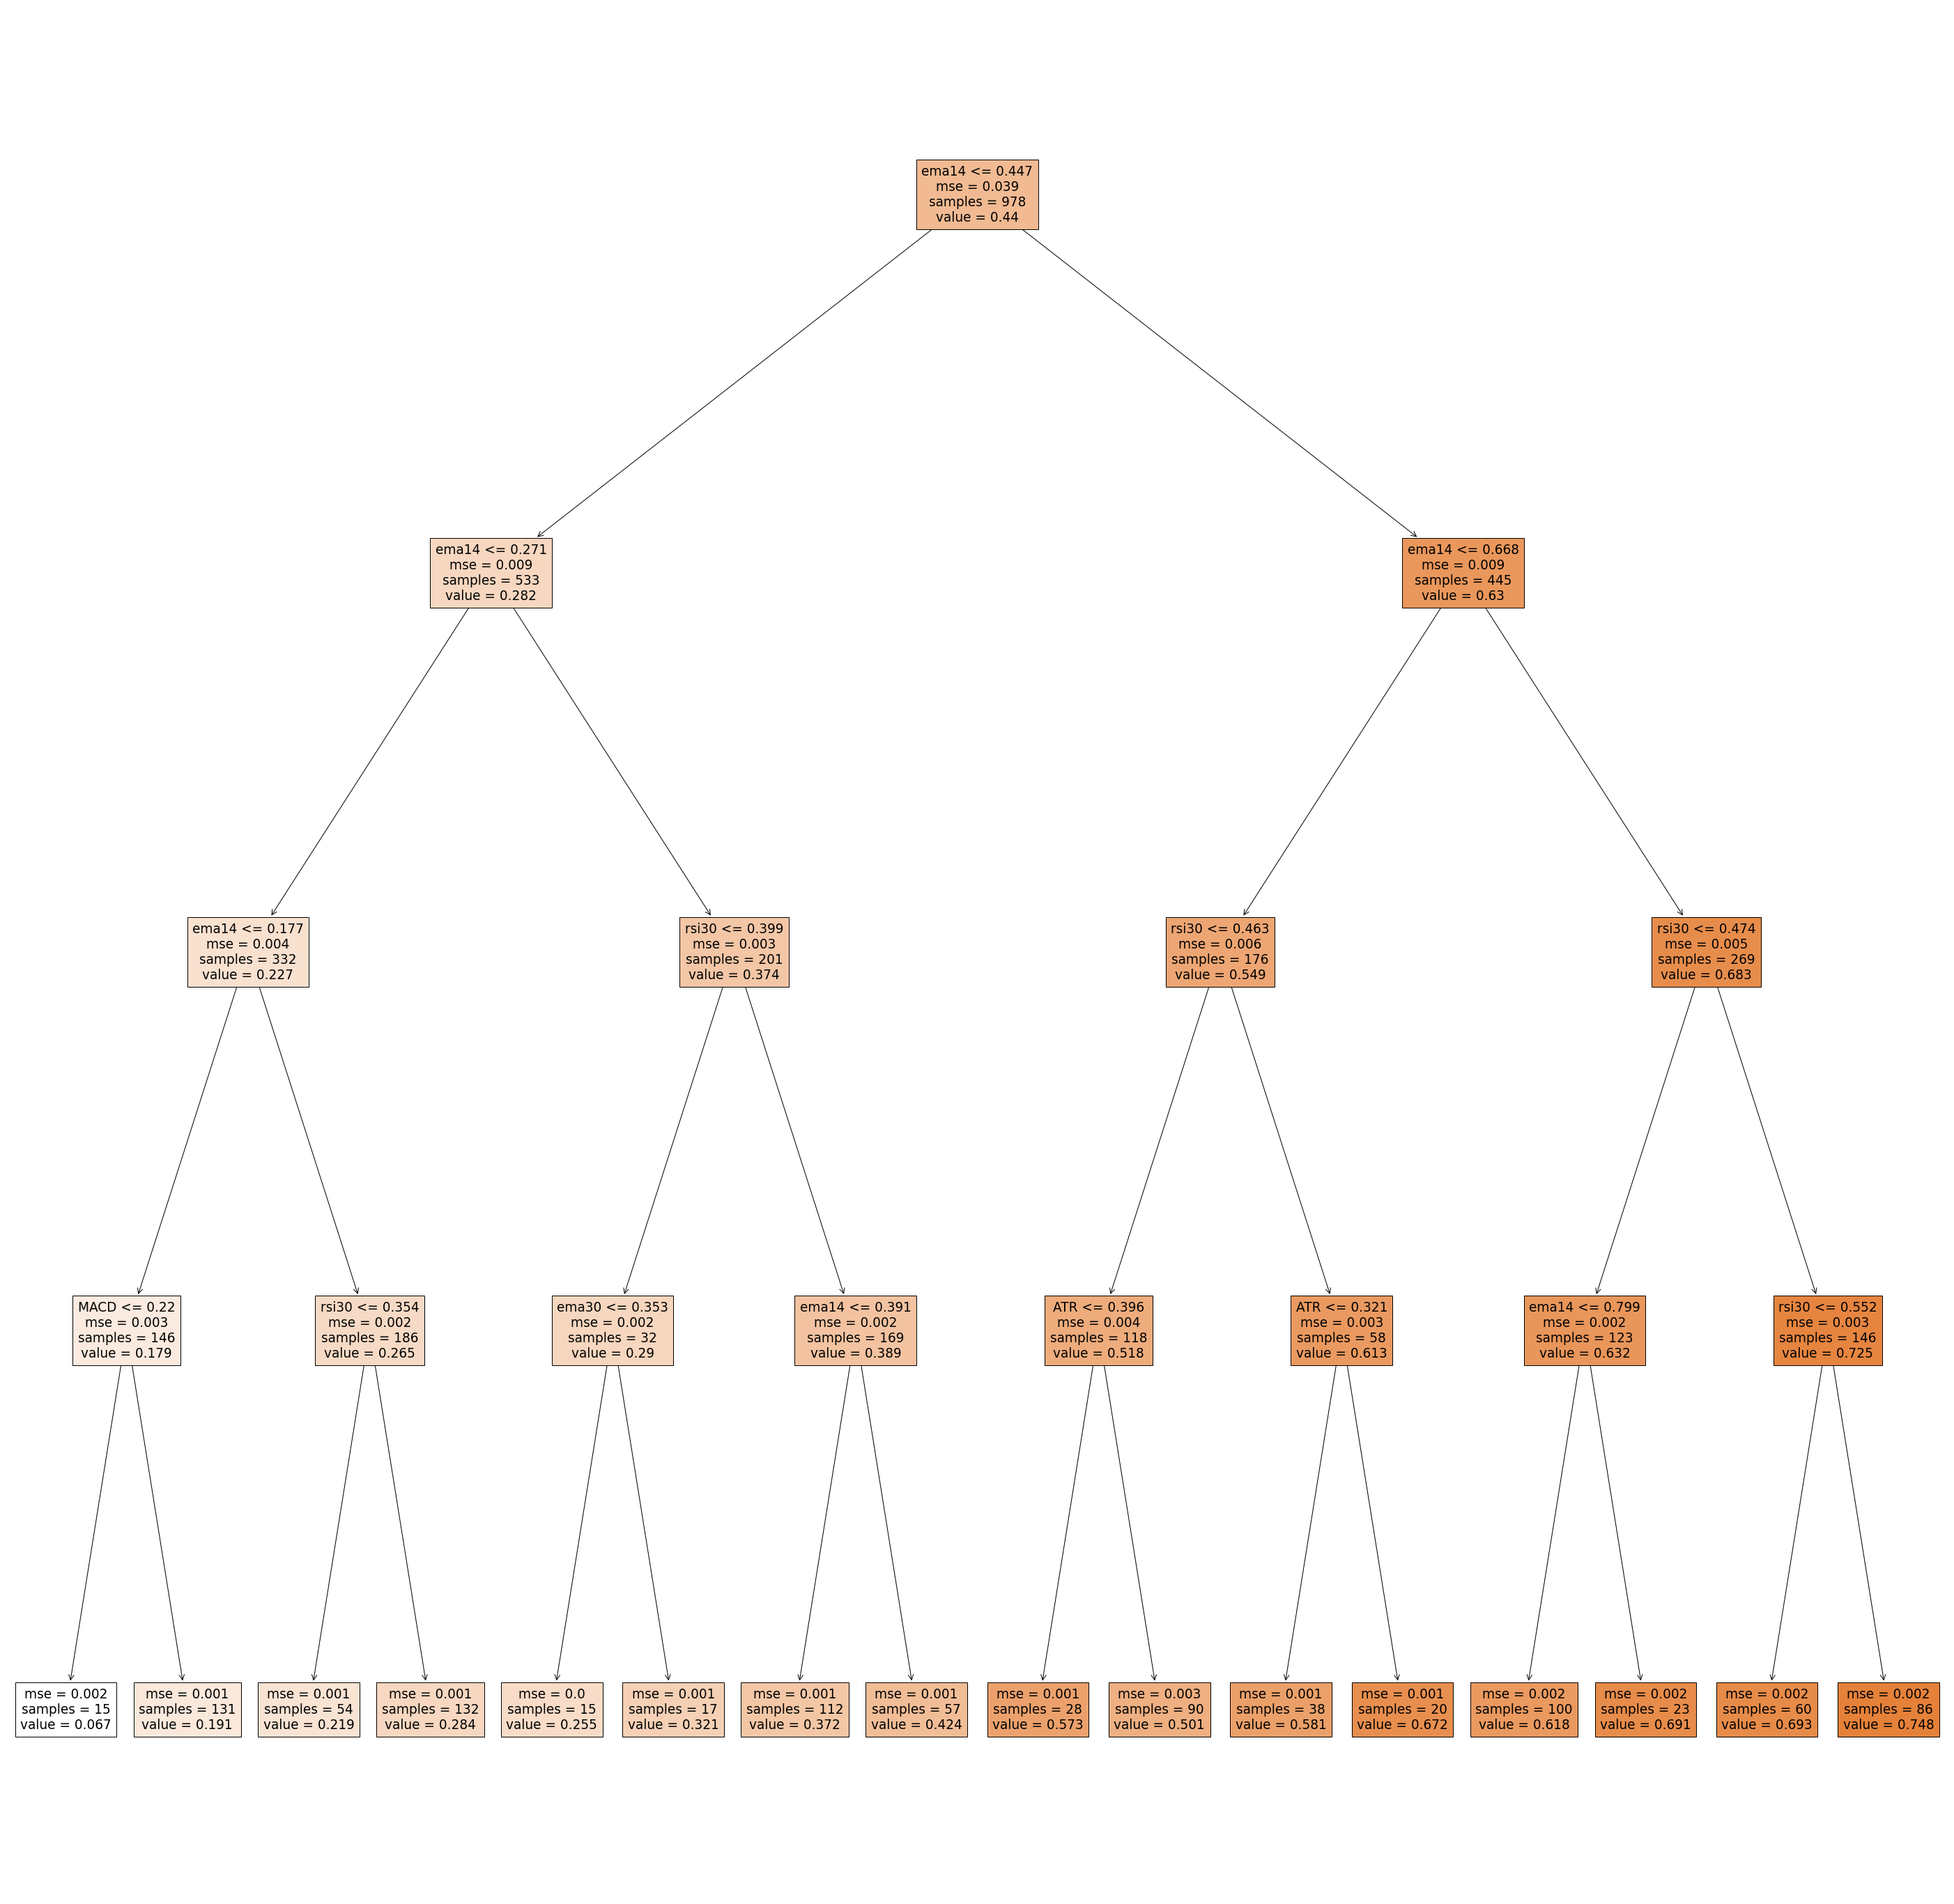

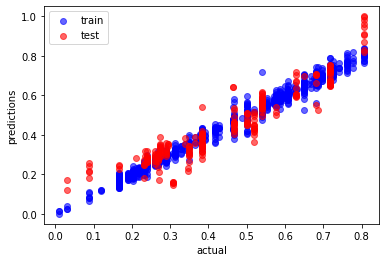

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
def DTR(train_features, train_targets, test_features, test_targets):
    score =[]
    for i in range(1, 10):
        decision_tree1 = DecisionTreeRegressor(max_depth=i)
        decision_tree1.fit(train_features, train_targets)
        score.append(decision_tree1.score(test_features, test_targets))
    print('DTR best depth', np.argmax(score)+1)       
    decision_tree = DecisionTreeRegressor(max_depth=np.argmax(score)+1)
    decision_tree.fit(train_features, train_targets)
    print('DTR train', decision_tree.score(train_features, train_targets))
    print('DTR test', decision_tree.score(test_features, test_targets), '\n')

    plt.figure(figsize=(50, 50))
    #plot tree with 4 depth
    tree.plot_tree(DecisionTreeRegressor(max_depth=4).fit(train_features, train_targets), 
                   filled=True, feature_names=feature_names)
    plt.show()
    train_predictions = decision_tree.predict(train_features)
    test_predictions = decision_tree.predict(test_features)
    # Scatter the predictions vs actual values
    plt.scatter(train_predictions, train_targets, label='train', alpha = 0.6, c='b')
    plt.scatter(test_predictions, test_targets, label='test', alpha = 0.6, c='r')
    plt.xlabel('actual')
    plt.ylabel('predictions')
    plt.legend()
    plt.show()
DTR(train_features, train_targets, test_features, test_targets)

RF best depth 7
RF train 0.9928993772992686
RF test 0.9101756215469754 



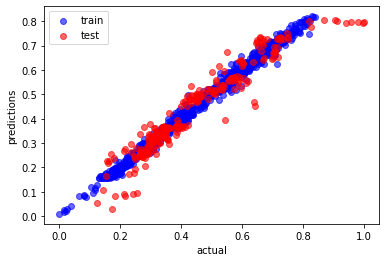

In [26]:
from sklearn.ensemble import RandomForestRegressor
def RF(train_features, train_targets, test_features, test_targets):
    score = []
    for i in range(1, 10):
        decision_tree1 = RandomForestRegressor(max_depth=i)
        decision_tree1.fit(train_features, train_targets)
        score.append(decision_tree1.score(test_features, test_targets))
    print('RF best depth', np.argmax(score)+1)
    rfr = RandomForestRegressor(n_estimators=400,
                                max_depth=np.argmax(score)+1,
                                random_state=42)
    rfr.fit(train_features, train_targets)
    # Look at the R^2 scores on train and test
    print('RF train', rfr.score(train_features, train_targets))
    print('RF test',rfr.score(test_features, test_targets), '\n')
    train_predictions = rfr.predict(train_features)
    test_predictions = rfr.predict(test_features)
    plt.scatter(train_targets, train_predictions, label='train', alpha = 0.6, c='b')
    plt.scatter(test_targets, test_predictions, label='test', alpha = 0.6, c='r')
    plt.xlabel('actual')
    plt.ylabel('predictions')
    plt.legend()
    plt.show()
RF(train_features, train_targets, test_features, test_targets)

GBR best depth 1
GBR train 0.9830265125701871
GBR test 0.9355665112910613 



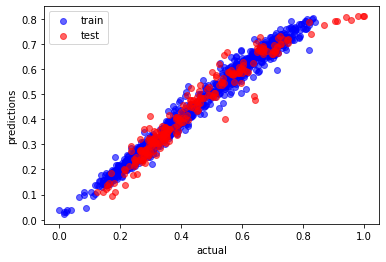

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
def GB(train_features, train_targets, test_features, test_targets):
    score = []
    for i in range(1, 10):
        score = []
        decision_tree1 = GradientBoostingRegressor(max_depth=i)
        decision_tree1.fit(train_features, train_targets)
        score.append(decision_tree1.score(test_features, test_targets))
    print('GBR best depth', np.argmax(score)+1)
    gbr = GradientBoostingRegressor(n_estimators=400,
                                    random_state=42,
                                    max_depth=np.argmax(score)+1
                                    )
    gbr.fit(train_features, train_targets)
    print('GBR train', gbr.score(train_features, train_targets))
    print('GBR test', gbr.score(test_features, test_targets), '\n')
    train_predictions = gbr.predict(train_features)
    test_predictions = gbr.predict(test_features)
    plt.scatter(train_targets, train_predictions, label='train', alpha = 0.6, c='b')
    plt.scatter(test_targets, test_predictions, label='test', alpha = 0.6, c='r')
    plt.xlabel('actual')
    plt.ylabel('predictions')
    plt.legend()
    plt.show()
GB(train_features, train_targets, test_features, test_targets)